In [124]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from midi_utils import plots
from midi_utils import preprocessing

%reload_ext autoreload
%autoreload 2

In [115]:
# loading
dataset = load_dataset("roszcz/internship-midi-data-science", split="train")
record = dataset[0]
df = pd.DataFrame(record["notes"]).sort_values(by='start')
df = preprocessing.create_time_features(df)
df

,end,pitch,start,velocity,duration,second,minute
0,2.058438,42,1.934219,74,0.124219,1,0
1,2.990469,66,1.935573,84,1.054896,1,0
2,2.044531,30,1.948229,76,0.096302,1,0
3,2.613073,49,2.556146,77,0.056927,2,0
4,2.618333,54,2.564844,59,0.053490,2,0
...,...,...,...,...,...,...,...
88882,10856.278125,82,10856.155208,54,0.122917,10856,180
88883,10856.724115,65,10856.187188,36,0.536927,10856,180
88884,10856.875625,70,10856.732500,34,0.143125,10856,180
88885,10856.849063,89,10856.750156,57,0.098906,10856,180


# Number of notes playerd per second in a record

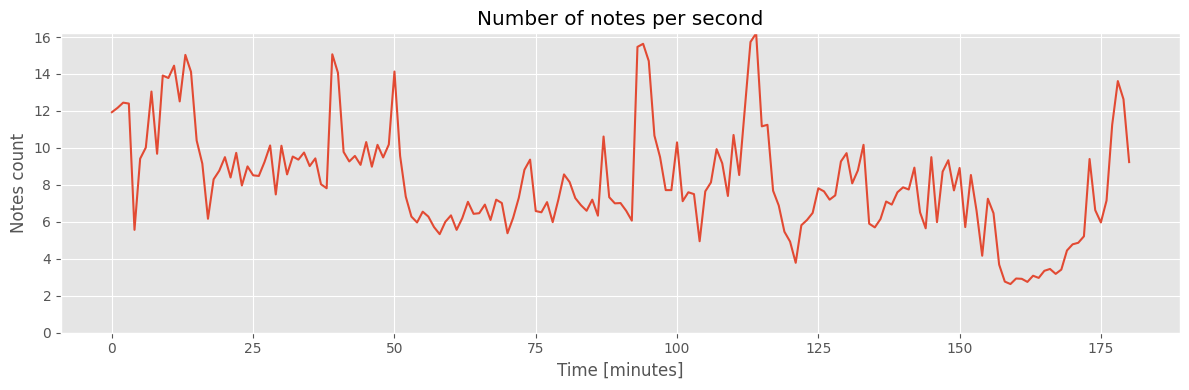

In [118]:
plots.plot_record_speed(df)

# Number of notes pressed at the same time

## Looking ahead

In [113]:
overlapping_indices = preprocessing.count_notes_lookahead(df)

In [122]:
# addinng this information to df, filtering to cases that have at least 2 notes played at the same time
df_lookahead = df.copy()
df_lookahead['overlapping_indices'] = overlapping_indices
df_lookahead['len_overlapp'] = df_lookahead.apply(lambda x: len(x['overlapping_indices']), axis=1)
df_lookahead = df_lookahead[df_lookahead['len_overlapp'] >= 2]
df_lookahead.head()

,end,pitch,start,velocity,duration,second,minute,overlapping_indices,len_overlapp
0,2.058438,42,1.934219,74,0.124219,1,0,"[0, 1, 2]",3
1,2.990469,66,1.935573,84,1.054896,1,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",12
2,2.044531,30,1.948229,76,0.096302,1,0,[2],1
3,2.613073,49,2.556146,77,0.056927,2,0,"[3, 4, 5]",3
4,2.618333,54,2.564844,59,0.053490,2,0,"[4, 5]",2


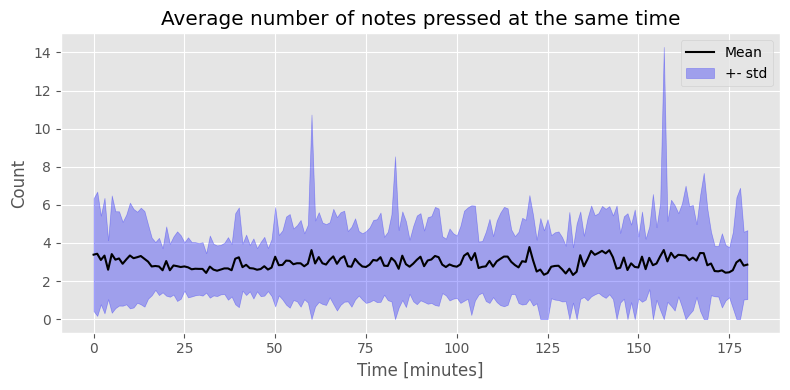

In [125]:
grouped_lookahead = (
    df_lookahead.groupby(['minute'])
    .agg(**{
        'len_overlapp_mean': pd.NamedAgg('len_overlapp', 'mean'),
        'len_overlapp_std': pd.NamedAgg('len_overlapp', 'std'),
    })
    .reset_index()
    .assign(
        lower_bound = lambda x: x['len_overlapp_mean'] - x['len_overlapp_std'],
        upper_bound = lambda x: x['len_overlapp_mean'] + x['len_overlapp_std'],
    )
)
# capping count at 0 as we can have negative count
grouped_lookahead.loc[:, 'lower_bound'] = np.where(grouped_lookahead['lower_bound'] > 0, grouped_lookahead['lower_bound'], 0)
plots.plot_notes_lookahead(grouped_lookahead)

## Grouping notes in fixed intervals

In [ ]:
record = df.iloc[:1200, :]
max_duration = int(record['end'].max())
interval_length = .5

# creating interval points like [(t1, t2), (t2, t3), ...]
time_interval = np.arange(0, max_duration, interval_length).tolist()
interval1, interval2 = time_interval[:-1], time_interval[1:]

# counting notes in a specified time intervals
# occurences = [{
#     'start': t1, 'end': t2,
#     'pitches': record[(record['start'] > t1) & (record['end'] <= t2)].shape[0]
#     } for t1, t2 in zip(interval1, interval2)
# ]

# occurences = pd.DataFrame(occurences, )
# occurences['counts'] = occurences.apply(lambda x: len(x['pitches']), axis=1)

# # jakos to inaczej zagregowac moze?
# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# ax.plot(occurences['counts'])
# fig.tight_layout()

In [12]:
sample = df.copy()

sample['interval'] = sample.apply(lambda x: pd.Interval(x['start'], x['end']), axis=1)

In [42]:
# intervals = list(zip(sample['start'], sample['end']))
intervals = [(1,3), (2,4), (5, 10), (12, 14), (13, 15)]
intervals1, intervals2 = intervals[:-1], intervals[1:]

new_intervals = []
cuurent_interval = None

for t1, t2 in zip(intervals1, intervals2):
    start1, end1 = t1
    start2, end2 = t2
    # print(t1, t2)
    if end1 >= start2 and end1 <= end2:
        print(start1, end2)
    # break

1 4
12 15


In [28]:
sample_df = df.iloc[:1000]

for idx, row in sample_df.iterrows():
    print(row)
    break
    # current_time = 

end          2.058438
pitch       42.000000
start        1.934219
velocity    74.000000
duration     0.124219
second       1.000000
minute       0.000000
Name: 0, dtype: float64


In [28]:
1+1

2